<a href="https://colab.research.google.com/github/rrizkiramadhan08/RizkiRamadhanTask/blob/main/Week06/Week06_Rizki_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Online Retail


In [64]:
# Import libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive

In [65]:
# Mount Google Drive untuk mengakses dataset
drive.mount('/content/drive')


In [66]:
# Load dataset dari Google Drive
dataset_path = '/content/drive/MyDrive/DATA SET/Online Retail.csv'
df = pd.read_csv(dataset_path)

In [67]:
# Mengambil sampel 500 data dari dataset
df_sampled = df.sample(n=500, random_state=42)

# Mengatasi missing values dengan imputasi untuk kolom numerik dan kategorikal
numerical_columns = df_sampled.select_dtypes(include=['number']).columns
categorical_columns = df_sampled.select_dtypes(include=['object']).columns

# Imputasi untuk kolom numerik (mean)
numerical_imputer = SimpleImputer(strategy='mean')
df_sampled[numerical_columns] = numerical_imputer.fit_transform(df_sampled[numerical_columns])

# Imputasi untuk kolom kategorikal (modus)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_sampled[categorical_columns] = categorical_imputer.fit_transform(df_sampled[categorical_columns])

# One-Hot Encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df_sampled, columns=categorical_columns)

# Standarisasi dataset
scaler = StandardScaler()
X = scaler.fit_transform(df_encoded)


In [68]:
 #Pipeline Model Clustering
# 1. K-Means Clustering
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X)

# 2. Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_model.fit_predict(X)

# 3. DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X)

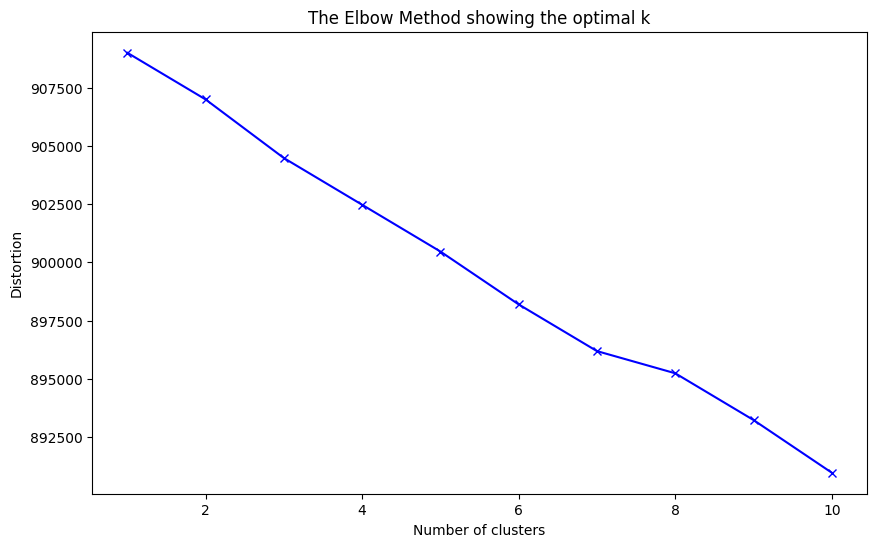

In [69]:
# Visualisasi Knee Method untuk K-Means
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [70]:
# Hitung Silhouette Score untuk setiap model
kmeans_silhouette = silhouette_score(X, kmeans_labels)
agg_silhouette = silhouette_score(X, agg_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Silhouette Score K-Means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score Agglomerative: {agg_silhouette:.2f}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette:.2f}')

Silhouette Score K-Means: -0.04
Silhouette Score Agglomerative: 0.02
Silhouette Score DBSCAN: -1.00


In [71]:
# Matriks Evaluasi Lain (Calinski-Harabasz Index)
kmeans_ch_score = calinski_harabasz_score(X, kmeans_labels)
agg_ch_score = calinski_harabasz_score(X, agg_labels)
dbscan_ch_score = calinski_harabasz_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Calinski-Harabasz Index K-Means: {kmeans_ch_score:.2f}')
print(f'Calinski-Harabasz Index Agglomerative: {agg_ch_score:.2f}')
print(f'Calinski-Harabasz Index DBSCAN: {dbscan_ch_score:.2f}')


Calinski-Harabasz Index K-Means: 1.20
Calinski-Harabasz Index Agglomerative: 1.44
Calinski-Harabasz Index DBSCAN: -1.00


In [72]:

# Kesimpulan Model Terbaik Berdasarkan Evaluasi
print("\nKesimpulan Model Terbaik Berdasarkan Evaluasi:")
if kmeans_silhouette > agg_silhouette and kmeans_silhouette > dbscan_silhouette:
    print("K-Means adalah model terbaik berdasarkan Silhouette Score.")
elif agg_silhouette > kmeans_silhouette and agg_silhouette > dbscan_silhouette:
    print("Agglomerative Clustering adalah model terbaik berdasarkan Silhouette Score.")
else:
    print("DBSCAN adalah model terbaik berdasarkan Silhouette Score (jika applicable).")

if kmeans_ch_score > agg_ch_score and kmeans_ch_score > dbscan_ch_score:
    print("K-Means adalah model terbaik berdasarkan Calinski-Harabasz Index.")
elif agg_ch_score > kmeans_ch_score and agg_ch_score > dbscan_ch_score:
    print("Agglomerative Clustering adalah model terbaik berdasarkan Calinski-Harabasz Index.")
else:
    print("DBSCAN adalah model terbaik berdasarkan Calinski-Harabasz Index (jika applicable).")


Kesimpulan Model Terbaik Berdasarkan Evaluasi:
Agglomerative Clustering adalah model terbaik berdasarkan Silhouette Score.
Agglomerative Clustering adalah model terbaik berdasarkan Calinski-Harabasz Index.


##Kesimpulan
Berdasarkan hasil evaluasi, Agglomerative Clustering dipilih sebagai model terbaik karena memiliki nilai Silhouette Score tertinggi (0.02) dan Calinski-Harabasz Index tertinggi (1.44) di antara model-model yang diuji. Meskipun skor-skor ini tergolong rendah, Agglomerative Clustering tetap menunjukkan performa yang lebih baik dibandingkan K-Means dan DBSCAN, yang memiliki nilai negatif dan sangat rendah pada kedua metrik. Hal ini menunjukkan bahwa Agglomerative Clustering menghasilkan kualitas cluster yang relatif lebih baik meski pemisahan antar cluster masih lemah dalam dataset ini.

## Dataset clusteringweek06





In [73]:
# Import libraries yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import drive

In [74]:
# Mount Google Drive untuk mengakses dataset
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
# Load dataset dari Google Drive
dataset_path = '/content/drive/MyDrive/DATA SET/clusteringweek06.csv'
df = pd.read_csv(dataset_path)

In [76]:
# Preprocessing: Standarisasi dataset
scaler = StandardScaler()
X = scaler.fit_transform(df)


In [77]:
# Pipeline Model Clustering
# 1. K-Means Clustering
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X)

# 2. Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_model.fit_predict(X)

# 3. DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X)

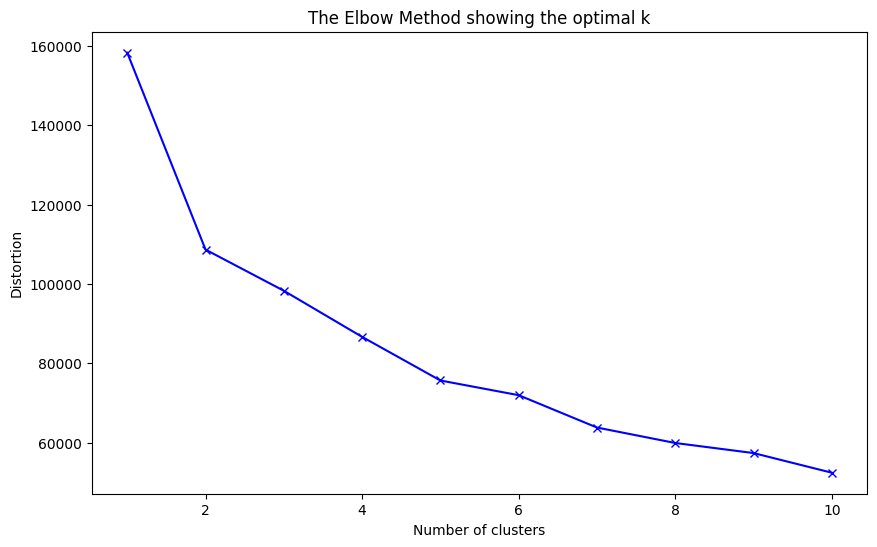

In [78]:
# Visualisasi Knee Method untuk K-Means
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [79]:
# Hitung Silhouette Score untuk setiap model
kmeans_silhouette = silhouette_score(X, kmeans_labels)
agg_silhouette = silhouette_score(X, agg_labels)
dbscan_silhouette = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Silhouette Score K-Means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score Agglomerative: {agg_silhouette:.2f}')
print(f'Silhouette Score DBSCAN: {dbscan_silhouette:.2f}')


Silhouette Score K-Means: 0.35
Silhouette Score Agglomerative: 0.35
Silhouette Score DBSCAN: -0.23


In [80]:
# Matriks Evaluasi Lain (Calinski-Harabasz Index)
kmeans_ch_score = calinski_harabasz_score(X, kmeans_labels)
agg_ch_score = calinski_harabasz_score(X, agg_labels)
dbscan_ch_score = calinski_harabasz_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

print(f'Calinski-Harabasz Index K-Means: {kmeans_ch_score:.2f}')
print(f'Calinski-Harabasz Index Agglomerative: {agg_ch_score:.2f}')
print(f'Calinski-Harabasz Index DBSCAN: {dbscan_ch_score:.2f}')


Calinski-Harabasz Index K-Means: 1980.55
Calinski-Harabasz Index Agglomerative: 2015.22
Calinski-Harabasz Index DBSCAN: 15.31


In [81]:

# Kesimpulan Model Terbaik Berdasarkan Evaluasi
print("\nKesimpulan Model Terbaik Berdasarkan Evaluasi:")
if kmeans_silhouette > agg_silhouette and kmeans_silhouette > dbscan_silhouette:
    print("K-Means adalah model terbaik berdasarkan Silhouette Score.")
elif agg_silhouette > kmeans_silhouette and agg_silhouette > dbscan_silhouette:
    print("Agglomerative Clustering adalah model terbaik berdasarkan Silhouette Score.")
else:
    print("DBSCAN adalah model terbaik berdasarkan Silhouette Score (jika applicable).")

if kmeans_ch_score > agg_ch_score and kmeans_ch_score > dbscan_ch_score:
    print("K-Means adalah model terbaik berdasarkan Calinski-Harabasz Index.")
elif agg_ch_score > kmeans_ch_score and agg_ch_score > dbscan_ch_score:
    print("Agglomerative Clustering adalah model terbaik berdasarkan Calinski-Harabasz Index.")
else:
    print("DBSCAN adalah model terbaik berdasarkan Calinski-Harabasz Index (jika applicable).")


Kesimpulan Model Terbaik Berdasarkan Evaluasi:
K-Means adalah model terbaik berdasarkan Silhouette Score.
Agglomerative Clustering adalah model terbaik berdasarkan Calinski-Harabasz Index.


##Kesimpulan

Berdasarkan evaluasi, Agglomerative Clustering menjadi model terbaik karena memiliki skor Calinski-Harabasz Index tertinggi (2015.22), yang menunjukkan pembentukan cluster yang lebih baik dalam hal kedekatan antar titik dalam cluster dan pemisahan antar cluster. Meskipun K-Means memiliki nilai Silhouette Score yang sama dengan Agglomerative (0.35), Calinski-Harabasz Index K-Means sedikit lebih rendah (1980.55), menunjukkan performa yang kurang optimal dalam kompaksi cluster dibandingkan Agglomerative Clustering. Dengan demikian, Agglomerative Clustering lebih unggul secara keseluruhan, sementara DBSCAN dengan skor yang sangat rendah pada kedua metrik tidak cocok untuk dataset ini.